# Part II - Ford GoBike Data Explanation
## by Leslie Narh



## Investigation Overview

In this investigation, I wanted to look at the uptake of the service among the different user types and gender . I was also interested in time of day and day of the week when most trips happen as well as the trip duration.



## Dataset Overview

Original dataset had 183,412 rows/enteries and 16 columns/features. After data wrangling and cleaning of the Ford I had <strong>171,542 rows/enteries</strong> and <strong>7 columns/features</strong> for my analysis.<ul>
    <li><code>start_time</code> (in datetime format)</li>
    <li><code>end_time</code> (in datetime format)</li>
    <li><code>duration_min</code>(minutes)</li>
    <li><code>bike_share_for_all_trip</code> (in bool format)</li>
    <li><code>user_type</code>(subscriber or customer)</li>
    <li><code>member_gender</code></li>
    <li><code>age</code></li>
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
from matplotlib import rcParams

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike_clean = pd.read_csv('201902-fordgobike-wrangled.csv')

## How are trips distributed over specific times in a day?

Most rides are are in high demand from Monday - Friday, from 8am - 5pm with a slight dip on Mondays and Fridays. Demand drops significantly on the weekends. This indicates the service is predominantly used by residents to commute to and from work.

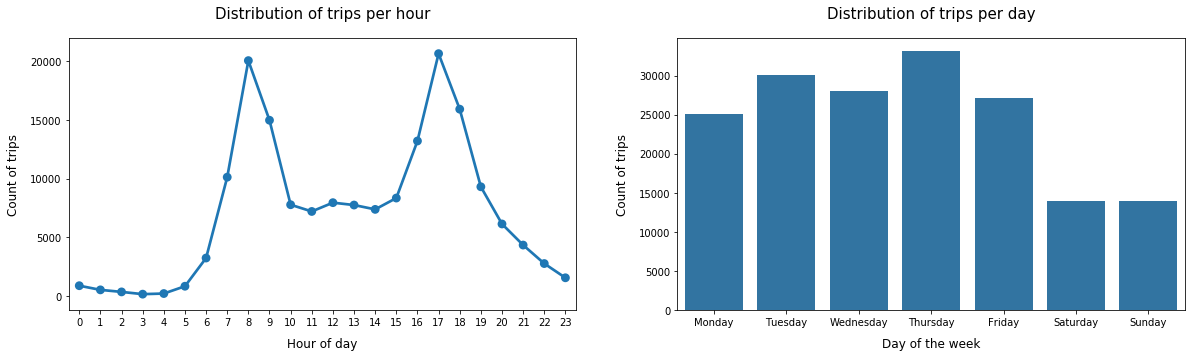

In [3]:
#Convert start_time to datetime
gobike_clean['start_time'] = pd.to_datetime(gobike_clean['start_time'])

plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]

#Extract hour from start_time
trips_per_hour = (gobike_clean['start_time'].dt.hour.value_counts())

#Create order for the daily trend
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#First subplot showing hourly trend for the day
plt.subplot(1,2,1)
sb.pointplot(x=trips_per_hour.index, y=trips_per_hour.values);
plt.title('Distribution of trips per hour', fontsize=15, y=1.05)
plt.xlabel('Hour of day', labelpad=10, fontsize=12)
plt.ylabel('Count of trips', labelpad=10, fontsize=12);

# Second subplot showing daily trend for the week
plt.subplot(1,2,2)
sb.countplot(data=gobike_clean, x=gobike_clean['start_time'].dt.day_name(), order=day_of_week, color=base_color);
plt.title('Distribution of trips per day', fontsize=15, y=1.05)
plt.xlabel('Day of the week', labelpad=10, fontsize=12)
plt.ylabel('Count of trips', labelpad=10, fontsize=12);

## Trips per hour for each user type

Subscriber demand in bike rides reveal a significant peak at 8am and 5pm. The demand drops after 8am and 5pm. The same trend can be seen in the Customer user type, but with a less significant peak at 8am  and 5pm. Further research from the Bay Wheels website indicates customers are casual users. This is evident in their usage trend as they could be making one-time trips and not regular users like the subscribers.

In [4]:
#Get hour from start_time
gobike_clean['hour'] = gobike_clean['start_time'].dt.hour

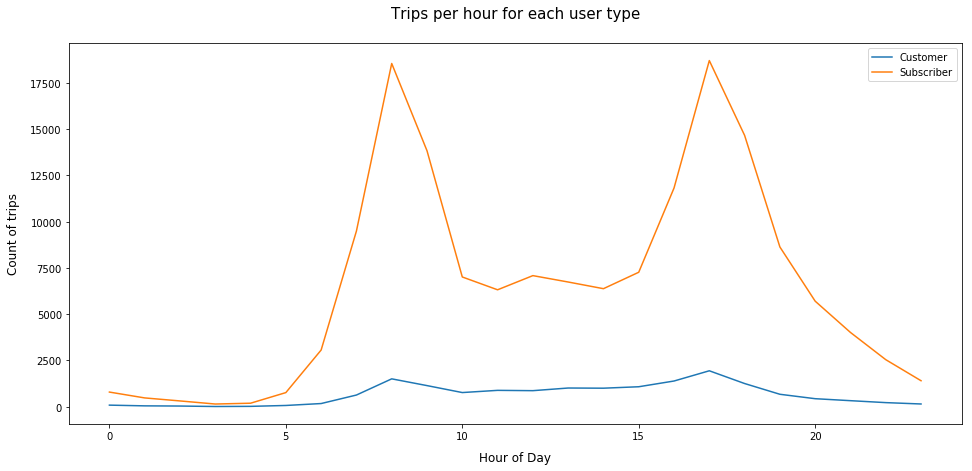

In [5]:
#Plot graph
gobike_clean.groupby(['user_type', 'hour']).size().unstack('user_type').plot(figsize=[16,7])
plt.title('Trips per hour for each user type', fontsize=15, y=1.05)
plt.xlabel('Hour of Day', labelpad=10, fontsize=12)
plt.ylabel('Count of trips', labelpad=10, fontsize=12)
plt.legend();
plt.show();

## Trips per day for each user type

For subscribers, bike rides demand are high during the working day and significantly low on the weekends. There is very little variation in the trend for customers. Demand dips over the weekend for subscribers and slightly on Monday and Friday. This analysis coupled with my previous line plots indicate the bike service is patronised typically by the working class.

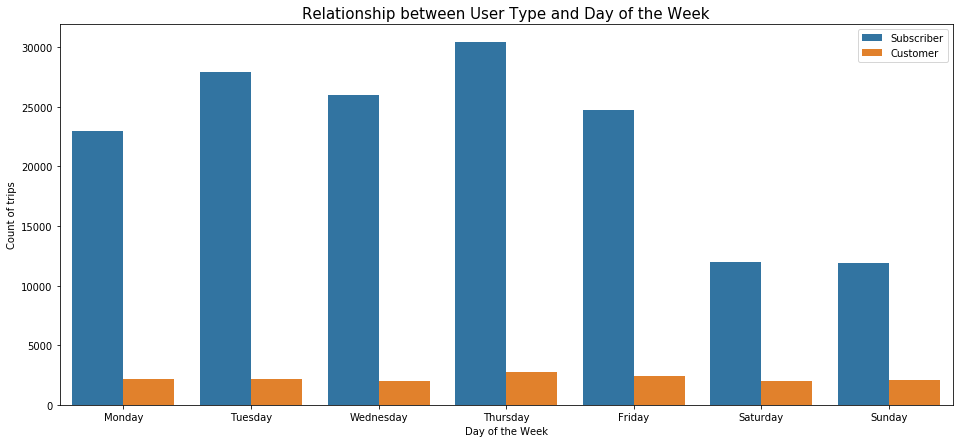

In [6]:
#Daily trips per user type
plt.figure(figsize=[16,7])
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.countplot(data = gobike_clean, x = gobike_clean['start_time'].dt.day_name(), 
             hue = 'user_type', order = day_of_week)
plt.title('Relationship between User Type and Day of the Week', fontsize = 15)

plt.legend();
plt.xlabel('Day of the Week');
plt.ylabel('Count of trips');

## Trip duration for each gender type

From the daily analysis,females and other gender tend to take a longer time in reaching their destination. Female trips are the longest on Monday, Thursday and Saturday. This could mean the male gender is probably faster or are usually starting trips late thus tend to rush.

In [16]:
#Function to create barplots
def myBarPlot(df, xVar, yVar, hueVar, palette=None, order=None, hue_order=None):
    '''
    Function to generate a bar plot based on the arguements provided
    palette, order, hue_order are set to default values
    inputs:
    ------
    xVar = x-axis variable
    yVar = y-axis variable
    hueVar = hue variable
    
    output:
    -------
    Generates Barplot with appropriate labels and values at x and y axis
    '''
    #Bar plot dimensions
    plt.figure(figsize=[14,6])

    #Plot graph
    sb.barplot(data=df, x=xVar, y=yVar, hue=hueVar, palette=palette, order=order, hue_order=hue_order);
    #Replacing _ with spaces for better representation
    xVar = xVar.replace("_"," ")
    yVar = yVar.replace("_"," ")
    hueVar = hueVar.replace("_"," ")
    #Add title
    plt.title(f'Average of {yVar} by {xVar} and {hueVar}'.title(),fontsize=14, weight="bold")
    #Add x-axis label
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    #Add y-axis label
    plt.ylabel(f'Average of {yVar}'.title(),fontsize=10, weight="bold")
    #Despine
    sb.despine()

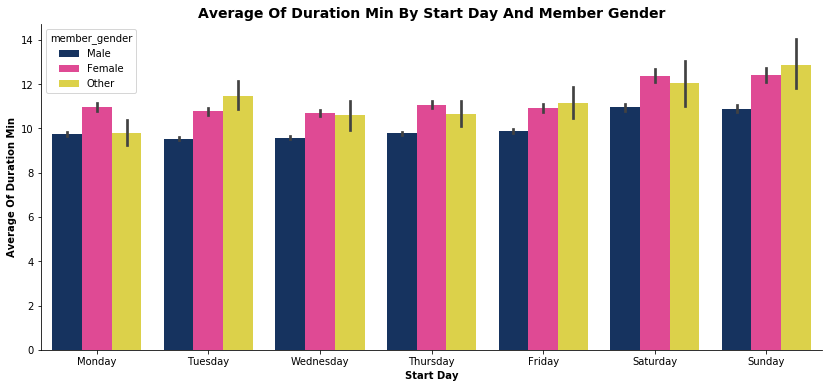

In [17]:
#set order of values
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gobike_clean['start_day'] = gobike_clean['start_time'].dt.day_name()
#Call plot function
myBarPlot(gobike_clean,'start_day','duration_min','member_gender',order=order,palette=['#0a306b','#f83194','#f4e532'])

## Trips duration for each user type

Subscriber trip duration is almost flat through out the week. I have 2 hypothesis from this analysis
<ol>
    <li>Subscribers use this service frequently,thus they are accustomed to the route and are able to manuever swiftly to their destinations.</li>
    <li>Subscribers are benefitting from a fixed price or fee waiver on the first 10 minutes. Thus, motivated to keep their trips within this scope</li>
</ol> 
There is a significant increase in trip duration for customers over the weekend. Customers are usually riding for fun or making a lot spontaneous trips during this period.

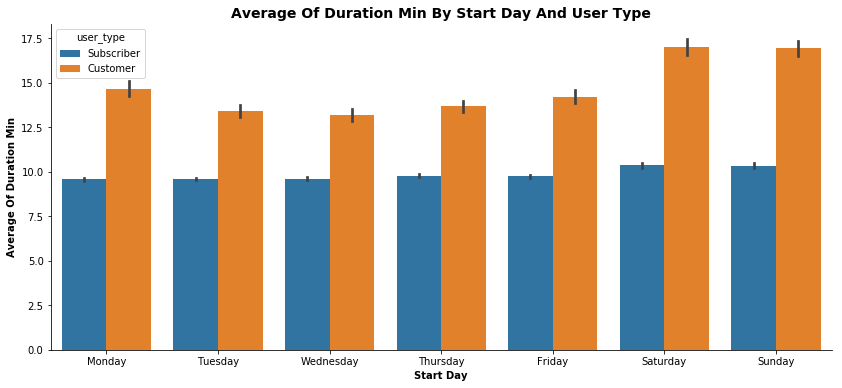

In [13]:
#set order of values
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gobike_clean['start_day'] = gobike_clean['start_time'].dt.day_name()
#Call plot function
myBarPlot(gobike_clean,'start_day','duration_min','user_type',order=order)

In [ ]:
!jupyter nbconvert Part_II_Ford_GoBikeExplanatory_Data_Visualization.ipynb --to slides --post serve  --no-input --no-prompt 